# MVA Monocular Depth Estimation

### Import modules

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

from PIL import Image
from skimage.transform import resize

from networks.model import MVAAutoEncoder

### Load example single RGB image

Image height, width : (720, 1280)


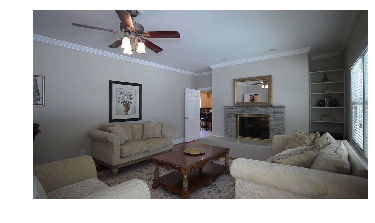

In [2]:
image = np.asarray(Image.open('./examples/88920000.jpg'))

ori_height, ori_width, _ = image.shape
print('Image height, width : ({}, {})'.format(ori_height, ori_width))

plt.imshow(image)
plt.axis('off')
plt.show()

### Normalize loaded image [0, 1]

In [3]:
normalized_img = image / 255.

### Convert numpy array to tensor
- if image size (height, width) != (480, 640) then resize image

In [4]:
tensor_img = tf.convert_to_tensor(normalized_img, dtype=tf.float32)
tensor_img = tf.expand_dims(tensor_img, axis=0)
    
print('Network input image shape : {}'.format(tensor_img.get_shape()))

Network input image shape : (1, 720, 1280, 3)


In [5]:
_, net_in_height, net_in_width, _ = tensor_img.get_shape().as_list()

if net_in_height != 480 and net_in_width != 640:
    tensor_img = tf.image.resize(tensor_img, [480, 640])

print('Network input image shape : {}'.format(tensor_img.get_shape()))

Network input image shape : (1, 480, 640, 3)


### Load trained model

In [6]:
net = MVAAutoEncoder()
model = net.build_model()
model.load_weights('./checkpoint/model.h5')

### Predict a depth image

In [7]:
pred = model.predict(tensor_img)
pred = pred.reshape((240, 320))
pred = np.clip((1000 / pred), 10, 1000)
print('Network output image shape : {}'.format(pred.shape))

Network output image shape : (240, 320)


Predicted depth image shape : (720, 1280)


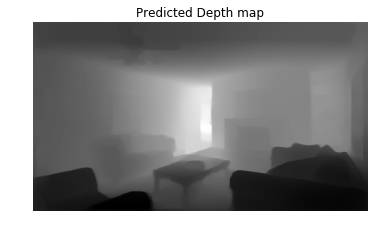

In [8]:
pred = resize(pred, (ori_height, ori_width), order=1, preserve_range=True, mode='reflect', anti_aliasing=True)

print('Predicted depth image shape : {}'.format(pred.shape))

plt.imshow(pred, cmap='gray')
plt.axis('off')
plt.title('Predicted Depth map')
plt.show()